# Project Report: Correlation Analysis Between COVID-19 Cases and Crime Rates in Los Angeles

## Introduction
This project investigates the potential correlation between COVID-19 cases and crime rates in Los Angeles from January 2020 to December 2023. The recent pandemic has significantly impacted various facets of life, including public health and safety. Understanding the relationship between pandemic trends and crime rates is crucial for effective policy making and resource allocation. This report details the methods employed in analyzing these datasets, presents the findings, and discusses the implications of the results.

## Methods

### Data Sources
1. COVID-19 Cases in LA (Jan 2020 - Dec 2022): Sourced from the Johns Hopkins University, this dataset offers an account of the pandemic's progression in LA. <a href="https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data">Link</a>
2. Crime Data in LA (Jan 2020 - Present): Provided by the Los Angeles Police Department, this dataset includes various categories of reported crimes during the specified period. <a href="https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data">Link</a>

### Data Pipeline
The data pipeline, includes the following stages:

#### Extraction
The data extraction process involves retrieving datasets from their respective sources. This includes COVID-19 case data from the Johns Hopkins University and crime data from the Los Angeles Police Department. The extraction process extracts the csv data and created a pandas dataframe from it.

#### Transformation
The transformation stage is critical in preparing the data for analysis. Key steps in this process include:

1. Date Table Creation: A comprehensive date table is generated to ensure consistency in date-related data across both datasets. This function, create_date_table, creates a DataFrame with a range of dates, including various components like year, month, day, and quarter. This standardization aids in accurate temporal analysis and comparison. This table is joined with the covid and crime datasets to perform analysis.

2. Reanaming and deleting columns: Script removes the unnecessary columns from the datasets, it also reanames the columns for efficient use during analysis.

3. Normalization of Data Formats: The script ensures that data formats, especially dates and categorical variables, are consistent across datasets. This step is crucial for accurate comparative analysis.

4. Handling Missing Values or discrepency in data: The pipeline includes mechanisms to identify and handle missing values e.g. Cross_Street data is blank for some records. The pipeline also includes mechanism to handle incorrect e.g. the covid data contains negative values for some columns.

5. Data Type Conversions: The script includes conversions of data types, ensuring that each column in the datasets is of the appropriate data type for analysis. For instance, converting strings to dates.

The above steps ensure that the data is clean, consistent, and ready for analysis. This detailed process is crucial for obtaining reliable and accurate insights from the data.

#### Loading
The final stage of the pipeline involves loading the transformed data into a structured format suitable for analysis. This stage ensures that the data is stored efficiently for easy retrieval and analysis in the subsequent stages of the project. For this project we are loading the data in a SQL database.

### Challenges Encountered
1. Inconsistent data formats across sources, required standardization.
2. Handling missing data presented a significant challenge, requiring careful consideration to avoid skewing results.
3. Incorrect data in the dataset, needed careful analysis to resolve the issue.
4. Notably, In the covid dataset there are months with zero reported cases (e.g., February to May 2022), which could be due to data collection anomalies or actual trends in case numbers.

## Results
The data is presented in the form of plots and bargraphs. These representations aim to depict trends and patterns without imparting any interpretation. Key visualizations include:

1. Crime rate trends over the same period.
2. Time series analysis of COVID-19 cases.
3. Comparative analysis on a monthly and yearly basis.

In [140]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [141]:
pd.set_option('display.max_columns', None)

In [142]:
conn = sqlite3.connect("..\\data\\made-project_new.db")

### Crime Data Analysis

In [143]:
crime_df = pd.read_sql_query("SELECT * FROM CRIME_DATA", conn)
calander_df = pd.read_sql_query("SELECT * FROM CALENDER_DATA", conn)

# Joining the crime and covid data with calander data
crime_df = pd.merge(crime_df, calander_df, left_on='Date_Occured', right_on='Date', how='left')

# filtering the crime data for crimes after 2019
crime_df = crime_df[crime_df['Year'] >= 2020]

In [144]:
crime_df.head(10)

,DR_NO,Date_Reported,Date_Occured,AREA,Area_Name,Crime_Code,Crime_Code_Description,Victim_Age,Victim_Sex,Victim_Descent,Weapon_Code,Weapon_Description,Location,Cross_Street,Latitute,Longitude,Victim_Descent_Desc,Date,Day,Month,Year,Month_Name,Weekday,Weekday_Name,Quarter,Month-Year,Year-Quarter
0,10304468,2020-01-08,2020-01-08,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,FEMALE,B,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,UNKNOWN,34.0141,-118.2978,Black,2020-01-08,08,01,2020,January,2,Wednesday,1,2020-01,2020-Q1
1,190101086,2020-01-02,2020-01-01,1,Central,624,BATTERY - SIMPLE ASSAULT,25,MALE,H,500,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,UNKNOWN,34.0459,-118.2545,Hispanic/Latin/Mexican,2020-01-01,01,01,2020,January,2,Wednesday,1,2020-01,2020-Q1
2,200110444,2020-04-14,2020-02-13,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,UNKNOWN,X,-1,None,200 E 6TH ST,UNKNOWN,34.0448,-118.2474,Unknown,2020-02-13,13,02,2020,February,3,Thursday,1,2020-02,2020-Q1
3,191501505,2020-01-01,2020-01-01,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,FEMALE,W,-1,None,5400 CORTEEN PL,UNKNOWN,34.1685,-118.4019,White,2020-01-01,01,01,2020,January,2,Wednesday,1,2020-01,2020-Q1
4,191921269,2020-01-01,2020-01-01,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,UNKNOWN,X,-1,None,14400 TITUS ST,UNKNOWN,34.2198,-118.4468,Unknown,2020-01-01,01,01,2020,January,2,Wednesday,1,2020-01,2020-Q1
5,200100501,2020-01-02,2020-01-01,1,Central,121,"RAPE, FORCIBLE",25,FEMALE,H,500,UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,UNKNOWN,34.0452,-118.2534,Hispanic/Latin/Mexican,2020-01-01,01,01,2020,January,2,Wednesday,1,2020-01,2020-Q1
6,200100502,2020-01-02,2020-01-02,1,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,MALE,H,-1,None,700 S FIGUEROA ST,UNKNOWN,34.0483,-118.2631,Hispanic/Latin/Mexican,2020-01-02,02,01,2020,January,3,Thursday,1,2020-01,2020-Q1
7,200100504,2020-01-04,2020-01-04,1,Central,946,OTHER MISCELLANEOUS CRIME,0,UNKNOWN,X,-1,None,200 E 6TH ST,UNKNOWN,34.0448,-118.2474,Unknown,2020-01-04,04,01,2020,January,5,Saturday,1,2020-01,2020-Q1
8,200100507,2020-01-04,2020-01-04,1,Central,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23,MALE,B,-1,None,700 BERNARD ST,UNKNOWN,34.0677,-118.2398,Black,2020-01-04,04,01,2020,January,5,Saturday,1,2020-01,2020-Q1
9,200100509,2020-01-04,2020-01-04,1,Central,330,BURGLARY FROM VEHICLE,29,MALE,A,306,ROCK/THROWN OBJECT,15TH,OLIVE,34.0359,-118.2648,Other_Asian,2020-01-04,04,01,2020,January,5,Saturday,1,2020-01,2020-Q1


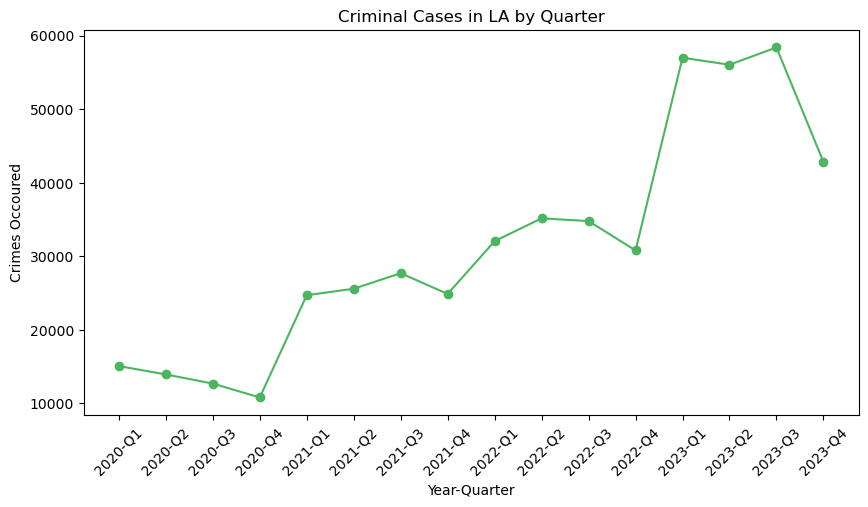

In [145]:
crime_grp_Y_Q = crime_df.groupby('Year-Quarter').size().reset_index(name='crime_counts')

plt.figure(figsize=(10, 5))
plt.plot(crime_grp_Y_Q['Year-Quarter'], crime_grp_Y_Q['crime_counts'], marker='o', color='#4cb55f')
plt.xlabel('Year-Quarter')
plt.ylabel('Crimes Occoured')
plt.title('Criminal Cases in LA by Quarter')
plt.xticks(rotation=45)
plt.show()

### Observation

In above chart we see there is sudden spike between Q4 to Q1 of every year. We need to further analyse this data.

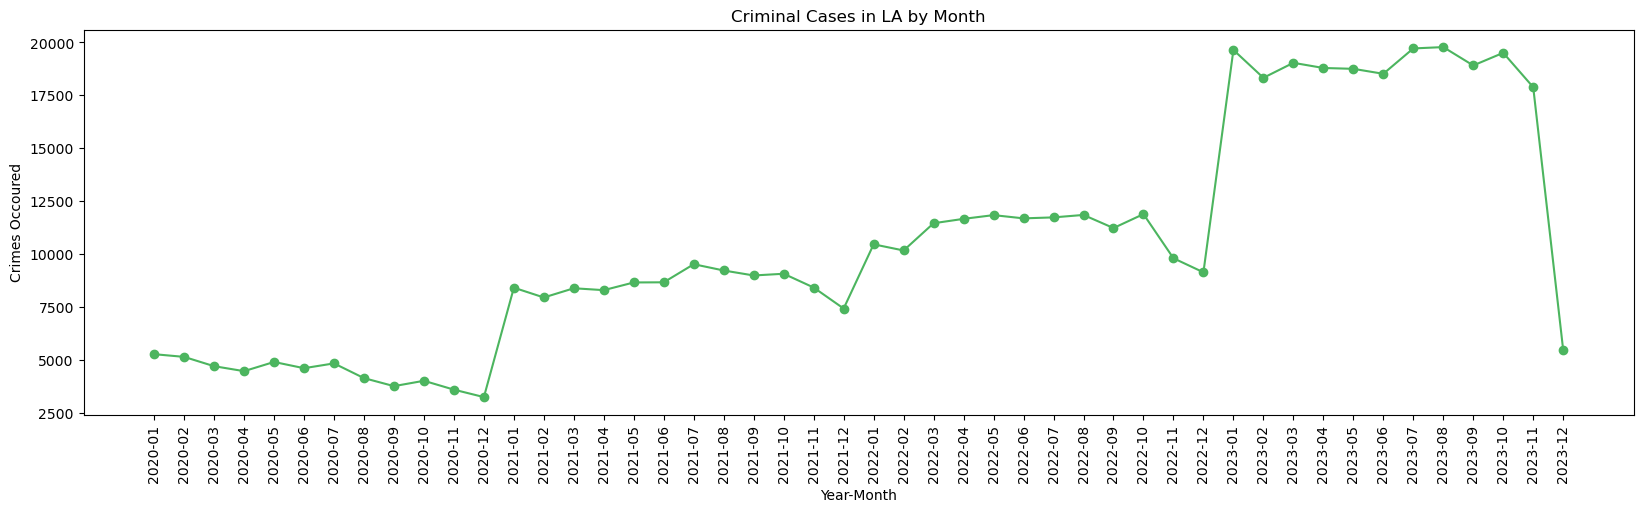

In [146]:
crime_grp_Y_M = crime_df.groupby('Month-Year').size().reset_index(name='crime_counts')

plt.figure(figsize=(20, 5))
plt.plot(crime_grp_Y_M['Month-Year'], crime_grp_Y_M['crime_counts'], marker='o', color='#4cb55f')
plt.xlabel('Year-Month')
plt.ylabel('Crimes Occoured')
plt.title('Criminal Cases in LA by Month')
plt.xticks(rotation=90)
# plt.legend()
plt.show()

### Observation

In above chart we see the sudden spike between Q4 to Q1 of every year, is happening between December and January of every year.

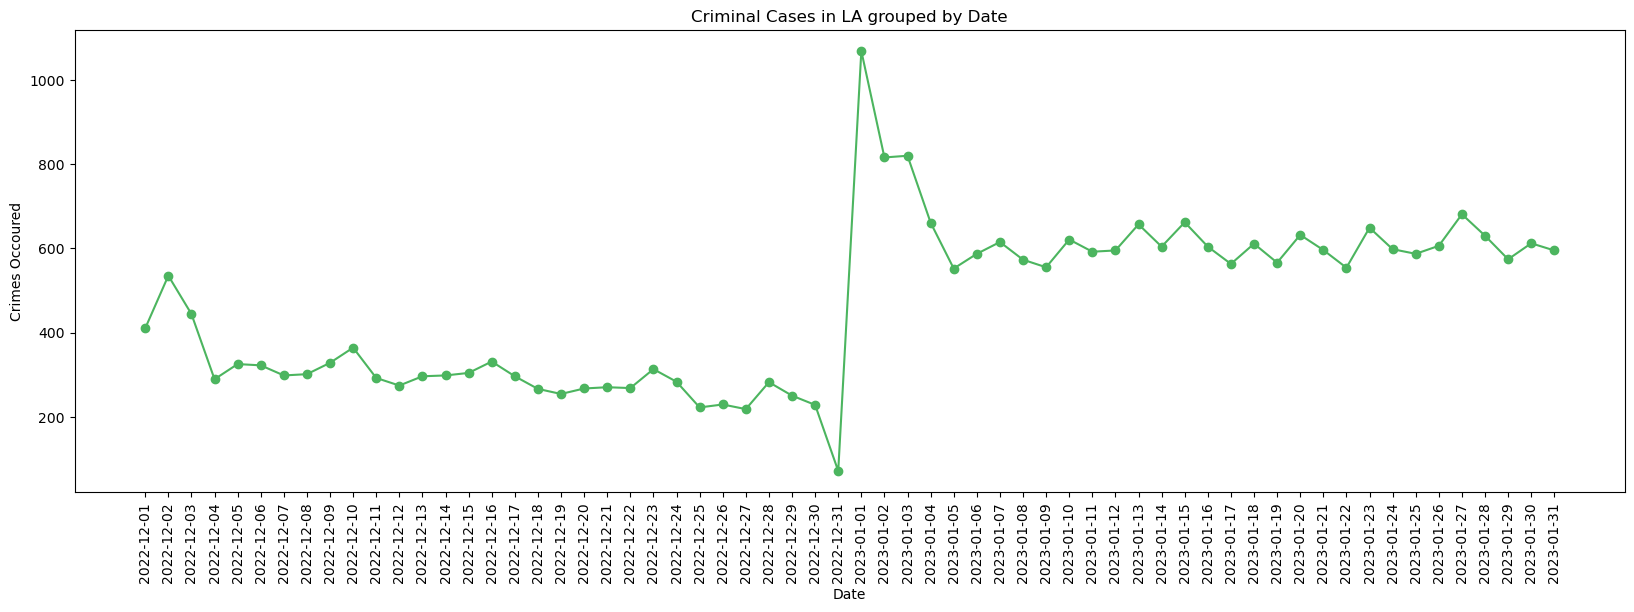

In [147]:
crime_grp_Date = crime_df[(crime_df['Month-Year'] >= '2022-12') & (crime_df['Month-Year'] <= '2023-01')].groupby('Date').size().reset_index(name='crime_counts')

plt.figure(figsize=(20, 6))
# plt.xlim(left=min(crime_grp_Date['Day'].astype('int')) - 1.8, right=max(crime_grp_Date['Day'].astype('int'))-0.2)
plt.plot(crime_grp_Date['Date'], crime_grp_Date['crime_counts'], marker='o', color='#4cb55f')
plt.xlabel('Date')
plt.ylabel('Crimes Occoured')
plt.title('Criminal Cases in LA grouped by Date')
plt.xticks(rotation=90)
plt.show()

### Observation

There is a sudden spike in crimes around the new year, this spike could be due to the following:

* New Year Celebrations
* Increased Crowds
* Fireworks and Firearms
* High Alcohol Consumption
* Tourist Influx
* Stress and Mental Health Issues

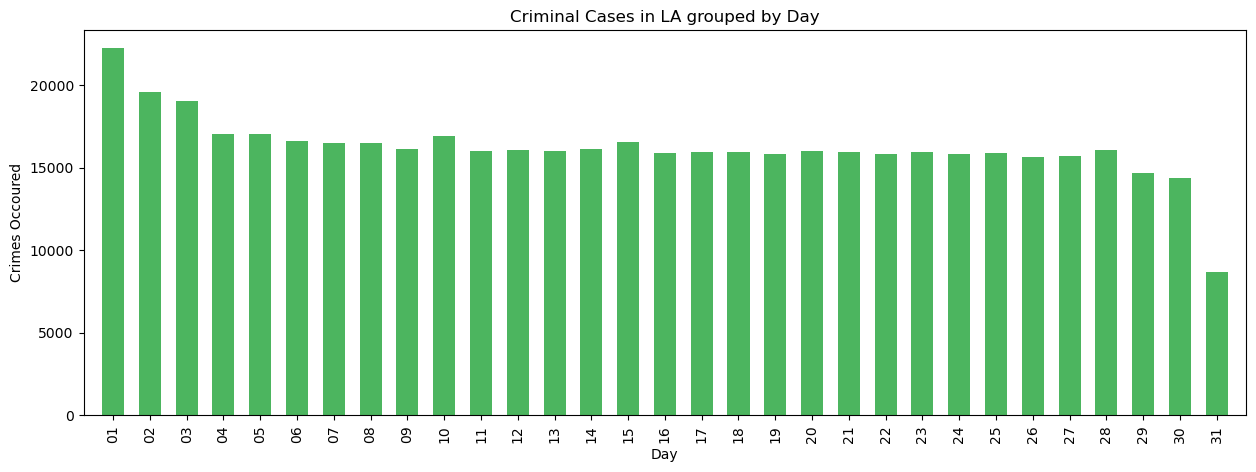

In [148]:
crime_grp_day = crime_df.groupby('Day').size().reset_index(name='crime_counts')

plt.figure(figsize=(15, 5))
plt.xlim(left=min(crime_grp_day['Day'].astype('int')) - 1.8, right=max(crime_grp_day['Day'].astype('int'))-0.2)
plt.bar(crime_grp_day['Day'], crime_grp_day['crime_counts'], color='#4cb55f', width=0.6)
plt.xlabel('Day')
plt.ylabel('Crimes Occoured')
plt.title('Criminal Cases in LA grouped by Day')
plt.xticks(rotation=90)
plt.show()

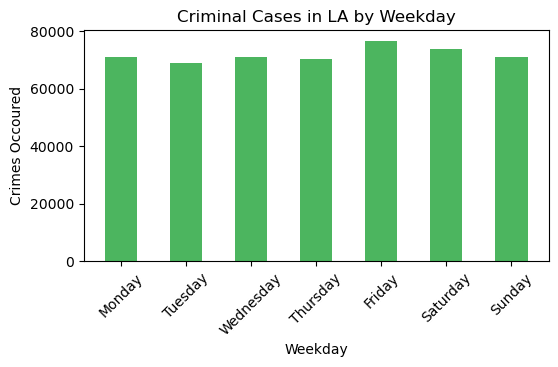

In [149]:
crime_grp_Week = crime_df.groupby('Weekday_Name').size().reset_index(name='crime_counts')

weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'Weekday_Name' column to a categorical column with the defined order
crime_grp_Week['Weekday_Name'] = pd.Categorical(crime_grp_Week['Weekday_Name'], categories=weekdays_order, ordered=True)

# Sort the DataFrame by the 'Weekday_Name' column
crime_grp_Week = crime_grp_Week.sort_values('Weekday_Name')

plt.figure(figsize=(6, 3))
# plt.plot(crime_grp_Y_M['Weekday_Name'], crime_grp_Y_M['counts'], marker='o', label='Crimes occoured in LA', color='#4cb55f')
plt.bar(crime_grp_Week['Weekday_Name'], crime_grp_Week['crime_counts'], color='#4cb55f', width=0.5)
plt.xlabel('Weekday')
plt.ylabel('Crimes Occoured')
plt.title('Criminal Cases in LA by Weekday')
plt.xticks(rotation=45)
# plt.legend()
plt.show()

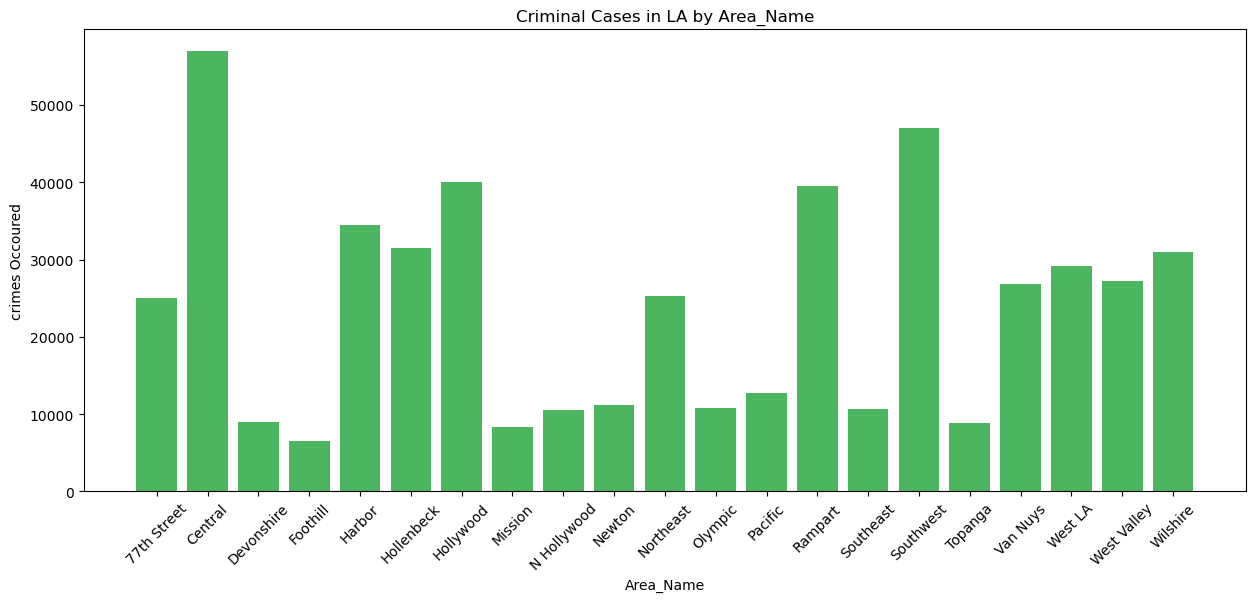

In [150]:
crime_grp_area = crime_df.groupby('Area_Name').size().reset_index(name='counts')

plt.figure(figsize=(15, 6))
plt.bar(crime_grp_area['Area_Name'], crime_grp_area['counts'], color='#4cb55f')
plt.xlabel('Area_Name')
plt.ylabel('crimes Occoured')
plt.title('Criminal Cases in LA by Area_Name')
plt.xticks(rotation=45)
plt.show()

### Covid Data Analysis

In [151]:
covid_df = pd.read_sql_query("SELECT * FROM COVID_DATA", conn)
covid_df = pd.merge(covid_df, calander_df, on='Date', how='left')

In [152]:
covid_df.head(10)

,Date,Cases_LA,Deaths_LA,Cases_California,Deaths_California,New_Cases_LA,New_Deaths_LA,New_Cases_California,New_Deaths_California,Day,Month,Year,Month_Name,Weekday,Weekday_Name,Quarter,Month-Year,Year-Quarter
0,2021-08-27,1407317,25284,4360789,65873,1930,21,14660,59,27,08,2021,August,4,Friday,3,2021-08,2021-Q3
1,2021-08-28,1407317,25284,4360789,65873,0,0,0,0,28,08,2021,August,5,Saturday,3,2021-08,2021-Q3
2,2021-08-30,1414854,25401,4405324,66301,2475,35,10613,119,30,08,2021,August,0,Monday,3,2021-08,2021-Q3
3,2021-08-31,1414854,25401,4405324,66301,0,0,0,0,31,08,2021,August,1,Tuesday,3,2021-08,2021-Q3
4,2021-09-01,1419030,25454,4418368,66470,2111,20,6798,87,01,09,2021,September,2,Wednesday,3,2021-09,2021-Q3
5,2021-09-02,1419030,25454,4418368,66470,0,0,0,0,02,09,2021,September,3,Thursday,3,2021-09,2021-Q3
6,2021-09-03,1421616,25477,4435277,66540,1056,12,11581,48,03,09,2021,September,4,Friday,3,2021-09,2021-Q3
7,2021-09-04,1423620,25514,4445862,66651,2004,37,10585,111,04,09,2021,September,5,Saturday,3,2021-09,2021-Q3
8,2021-09-05,1423620,25533,4451347,66791,0,19,5485,140,05,09,2021,September,6,Sunday,3,2021-09,2021-Q3
9,2021-09-06,1423620,25533,4451347,66791,0,0,0,0,06,09,2021,September,0,Monday,3,2021-09,2021-Q3


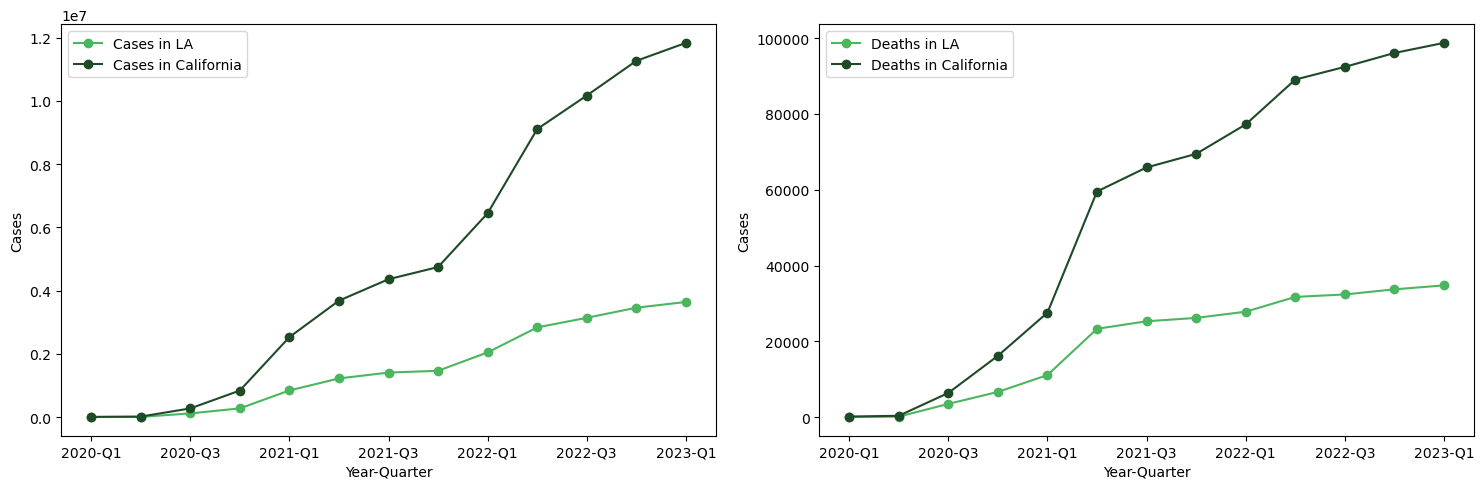

In [153]:
covid_cases_grp_Y_Q = covid_df.groupby('Year-Quarter').agg({'Cases_LA': 'first', 'Cases_California': 'first'}).reset_index()
covid_death_grp_Y_Q = covid_df.groupby('Year-Quarter').agg({'Deaths_LA': 'first', 'Deaths_California': 'first'}).reset_index()

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First subplot
ax1.plot(covid_cases_grp_Y_Q['Year-Quarter'], covid_cases_grp_Y_Q['Cases_LA'], marker='o', label='Cases in LA', color='#4cb55f')
ax1.plot(covid_cases_grp_Y_Q['Year-Quarter'], covid_cases_grp_Y_Q['Cases_California'], marker='o', label='Cases in California', color='#1f4a27')
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Cases')
ax1.legend()

ticks_to_use_1 = list(covid_cases_grp_Y_Q['Year-Quarter'][::2])
ax1.set_xticks(ticks_to_use_1)
ax1.set_xticklabels([str(i) for i in ticks_to_use_1])

# Second subplot
ax2.plot(covid_death_grp_Y_Q['Year-Quarter'], covid_death_grp_Y_Q['Deaths_LA'], marker='o', label='Deaths in LA', color='#4cb55f')
ax2.plot(covid_death_grp_Y_Q['Year-Quarter'], covid_death_grp_Y_Q['Deaths_California'], marker='o', label='Deaths in California', color='#1f4a27')
ax2.set_xlabel('Year-Quarter')
ax2.set_ylabel('Cases')
ax2.legend()

ticks_to_use_2 = list(covid_death_grp_Y_Q['Year-Quarter'][::2])
ax2.set_xticks(ticks_to_use_2)
ax2.set_xticklabels([str(i) for i in ticks_to_use_2])

# Automatically adjust subplot params so that the subplot(s) fits in to the figure area.
plt.tight_layout()

# Show the plot
plt.show()


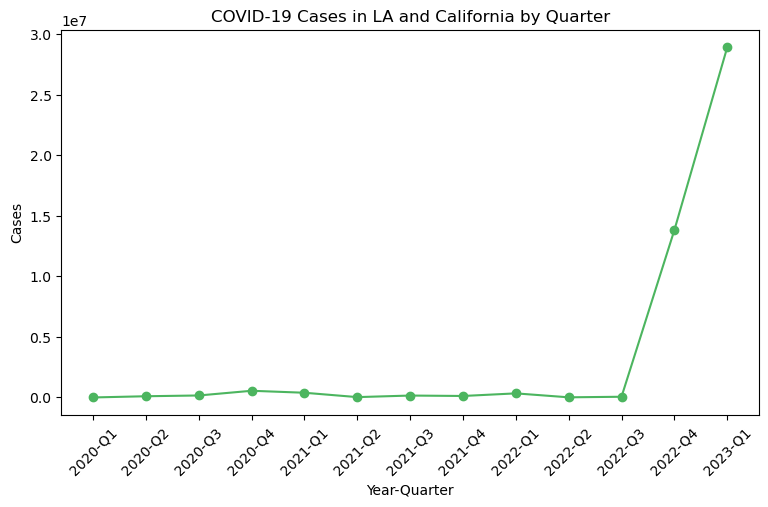

In [166]:
covid_cases_new_grp_Y_Q = covid_df.groupby('Year-Quarter').agg({'New_Cases_LA': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(covid_cases_new_grp_Y_Q['Year-Quarter'], covid_cases_new_grp_Y_Q['New_Cases_LA'], marker='o', color='#4cb55f')
plt.xlabel('Year-Quarter')
plt.ylabel('Cases')
plt.title('COVID-19 Cases in LA and California by Quarter')
plt.xticks(rotation=45)
plt.show()

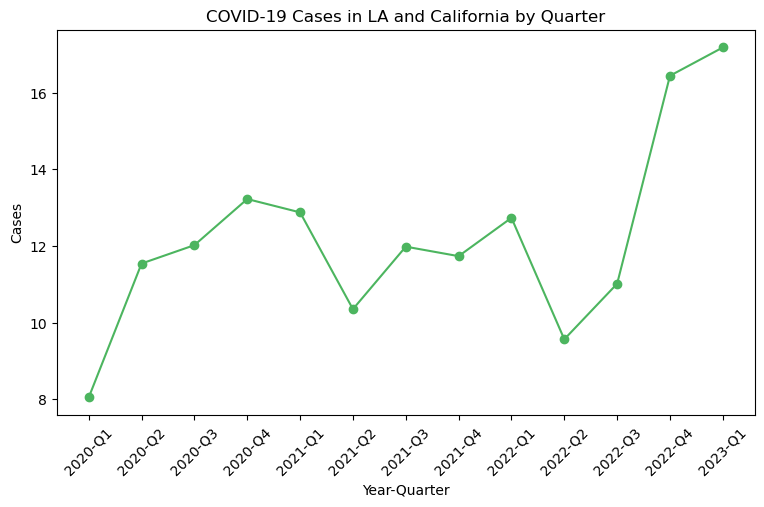

In [172]:
covid_cases_new_grp_Y_Q = covid_df.groupby('Year-Quarter').agg({'New_Cases_LA': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(covid_cases_new_grp_Y_Q['Year-Quarter'], np.log(covid_cases_new_grp_Y_Q['New_Cases_LA']), marker='o', color='#4cb55f')
plt.xlabel('Year-Quarter')
plt.ylabel('Cases')
plt.title('COVID-19 Cases in LA and California by Quarter')
plt.xticks(rotation=45)
plt.show()

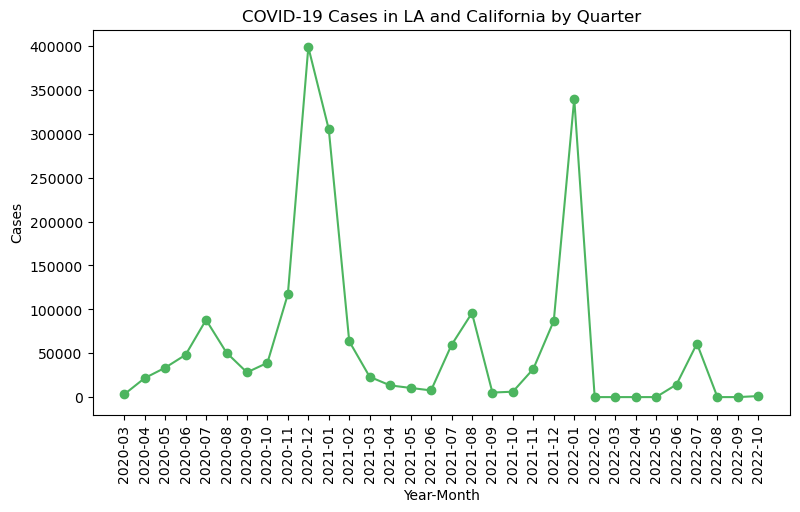

In [175]:
covid_cases_new_grp_Y_M = covid_df[(covid_df['Month-Year'] <= '2022-10')].groupby('Month-Year').agg({'New_Cases_LA': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(covid_cases_new_grp_Y_M['Month-Year'], covid_cases_new_grp_Y_M['New_Cases_LA'], marker='o', color='#4cb55f')
plt.xlabel('Year-Month')
plt.ylabel('Cases')
plt.title('COVID-19 Cases in LA and California by Quarter')
plt.xticks(rotation=90)
plt.show()

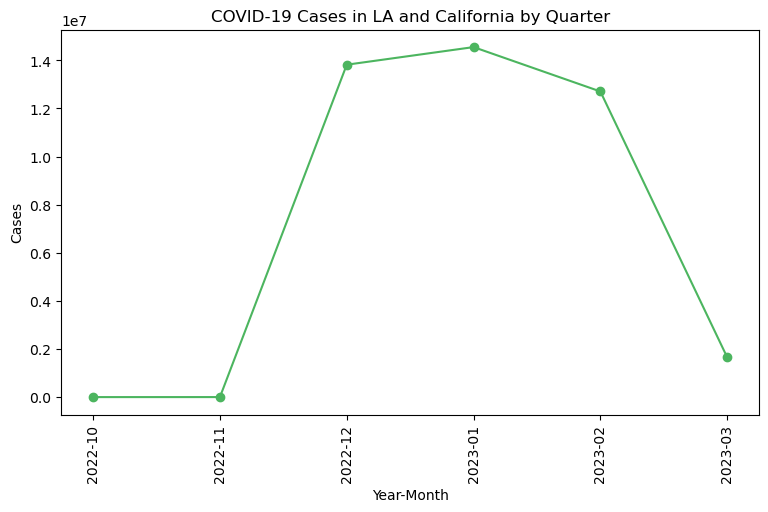

In [178]:
covid_cases_new_grp_Y_M = covid_df[(covid_df['Month-Year'] >= '2022-10')].groupby('Month-Year').agg({'New_Cases_LA': 'sum', 'New_Cases_California': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(covid_cases_new_grp_Y_M['Month-Year'], covid_cases_new_grp_Y_M['New_Cases_LA'], marker='o', color='#4cb55f')
plt.xlabel('Year-Month')
plt.ylabel('Cases')
plt.title('COVID-19 Cases in LA and California by Quarter')
plt.xticks(rotation=90)
plt.show()

#### Observation
The observed spikes in new COVID-19 cases in Los Angeles following May 2020, October 2020, June 2021, November 2021, June 2022, and November 2022 could be linked to a variety of factors:

1. <b>Seasonal Changes and Indoor Gathering:</b> The spikes in October and November of each year may be influenced by seasonal changes. As the weather cools, people tend to spend more time indoors where the virus can spread more easily. Additionally, these months coincide with holidays such as Halloween, Thanksgiving, and the start of the winter holiday season, when family gatherings and social events increase.

2. <b>Post-Holiday Surges:</b> The spikes following June and November could be related to holiday gatherings and increased travel. June follows Memorial Day, a time when people may travel or gather, and November follows Thanksgiving, traditionally a time for family reunions and large gatherings.

3. <b>Reopening and Relaxation of Restrictions:</b> The spike after May 2020 might be associated with the easing of initial lockdowns and restrictions. As businesses and public spaces reopened and people began to interact more, the likelihood of virus transmission increased.

4. <b>School Sessions and Vacations:</b> The June spikes could also correlate with the end of the school year and the beginning of summer vacation, leading to more travel and social activities among families and young people.

5. <b>Virus Variants and Immunity Waning:</b> The emergence of new, more contagious variants of the virus could have contributed to these spikes, as well as the potential waning of immunity in the population, either from previous infection or from vaccination.

<mark>It's important to recognize that these are hypotheses, and a comprehensive analysis would require examining public health policies, mobility data, testing rates, virus variants, vaccination coverage, and social behaviors in the context of these specific time periods.</mark>

In [198]:
covid_cases_new_grp_Y_M = covid_df.groupby('Year-Quarter').agg({'New_Cases_LA': 'sum'}).reset_index()


In [193]:
combined_df = pd.merge(crime_grp_Y_Q, covid_cases_new_grp_Y_M, on='Year-Quarter', how='inner')

In [194]:
combined_df

,Year-Quarter,crime_counts,New_Cases_LA
0,2020-Q1,15083,3140
1,2020-Q2,13945,103221
2,2020-Q3,12701,166739
3,2020-Q4,10816,554984
4,2021-Q1,24715,391720
5,2021-Q2,25590,31410
6,2021-Q3,27704,160326
7,2021-Q4,24885,125124
8,2022-Q1,32059,340001
9,2022-Q2,35164,14310


In [199]:
# Calculating the correlation
correlation = combined_df['crime_counts'].corr(combined_df['New_Cases_LA'])

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.7286622723945483


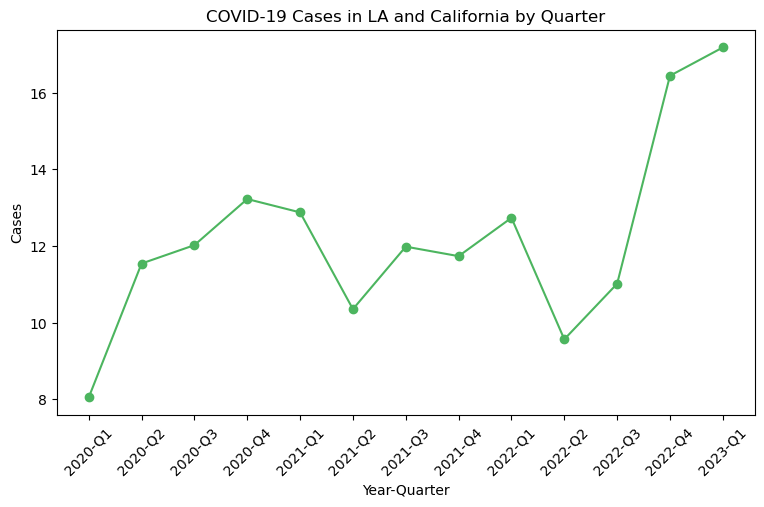

In [188]:
covid_cases_new_grp_Y_Q = covid_df.groupby('Year-Quarter').agg({'New_Cases_LA': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(covid_cases_new_grp_Y_Q['Year-Quarter'], np.log(covid_cases_new_grp_Y_Q['New_Cases_LA']), marker='o', color='#4cb55f')
plt.xlabel('Year-Quarter')
plt.ylabel('Cases')
plt.title('COVID-19 Cases in LA and California by Quarter')
plt.xticks(rotation=45)
plt.show()

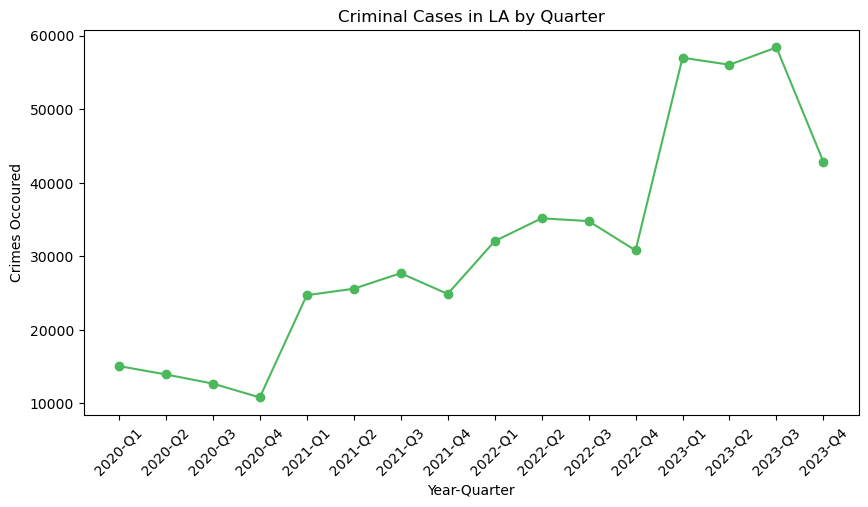

In [197]:
crime_grp_Y_Q = crime_df.groupby('Year-Quarter').size().reset_index(name='crime_counts')

plt.figure(figsize=(10, 5))
plt.plot(crime_grp_Y_Q['Year-Quarter'], crime_grp_Y_Q['crime_counts'], marker='o', color='#4bb85c')
plt.xlabel('Year-Quarter')
plt.ylabel('Crimes Occoured')
plt.title('Criminal Cases in LA by Quarter')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculating the correlation
correlation = df['column1'].corr(df['column2'])

print("Correlation coefficient:", correlation)

## Discussion/Conclusions
### Interpretation
* Preliminary analysis suggests a fluctuating correlation between COVID-19 cases and crimes. However, the correlation does not imply causation and varies over time.

### Limitations
* The study period may not be sufficient to establish long-term trends.
* External factors influencing crime rates, apart from COVID-19, are not accounted for in this analysis.

## Future Work
Further research could extend the analysis period, incorporate additional variables, and employ more sophisticated statistical models to unravel deeper insights into the complex relationship between public health crises and urban crime dynamics.